In [11]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

In [2]:
# Sistema de Lorenz
sigma = 10 
rho   = 28
beta  = 8 / 3

def f(s, t):
    x, y, z = s
    
    # Calcula as derivadas
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x* y - beta * z
    
    return np.array([dx, dy, dz])

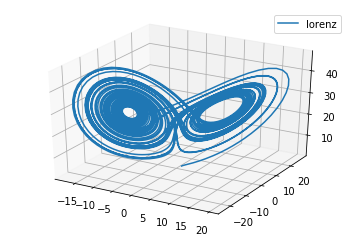

In [13]:
x, y, z = 1, 1 ,1 

s = np.array([x, y, z])
states = [s]

dt = 1e-2
t = 0
T = 50

# Iteramos utilizando o método de Runge-Kutta
while t < T:
    k1 = f(s, t)
    k2 = f(s + 2/3 * k1 * dt, t + 2/3 * dt)
    k_med = k1 * 1/4 + k2 * 3/4
    s = s + k_med * dt
    t = t + dt
    
    # Acrescenta novo estado à lista de estados
    states.append(s)

# Converte estado para matrix e extrai X, Y, Z
states = np.array(states).T
X = states[0]
Y = states[1]
Z = states[2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z, label='lorenz')
ax.legend()
plt.show()
